# Recursion + Top Down
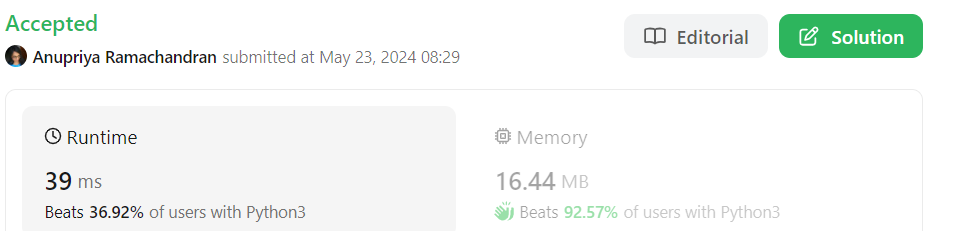

In [1]:
class Solution:
    def numDecodings(self, s: str) -> int:
        dp = [-1 for _ in range(len(s) + 1)]
        return self.helper(s, 0, dp)

    def helper(self, s, idx, dp):
        if idx == len(s):
            return 1

        if s[idx] == '0':
            return 0

        if dp[idx] == -1:
            single = self.helper(s, idx + 1, dp)
            multiple = 0
            if idx <len(s)-1 and 10 <= int(s[idx] + s[idx + 1]) <=26:
                multiple = self.helper(s, idx + 2, dp)

            dp[idx] = single + multiple
        return dp[idx]

# Bottom Up 
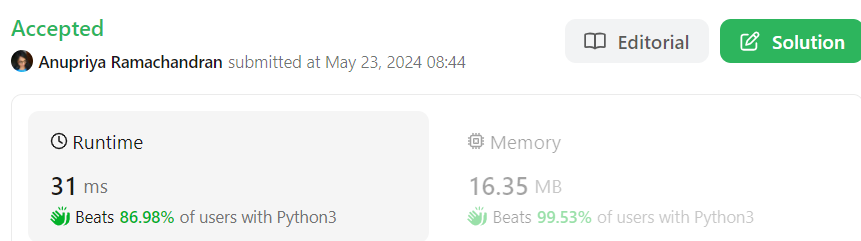

In [2]:
class Solution:
    def numDecodings(self, s: str) -> int:
        n = len(s)
        dp = [0 for _ in range(len(s) + 2)]
        dp[n] = 1

        for i in range(n-1, -1, -1):
            if s[i] == '0':
                dp[i] = 0
            else:
                single = dp[i + 1]

                multiple = 0
                if i < n -1  and 10 <= int(s[i] + s[i+1]) <= 26:
                    multiple = dp[i + 2]

                dp[i] = single + multiple
        return dp[0]

# Space Optimization
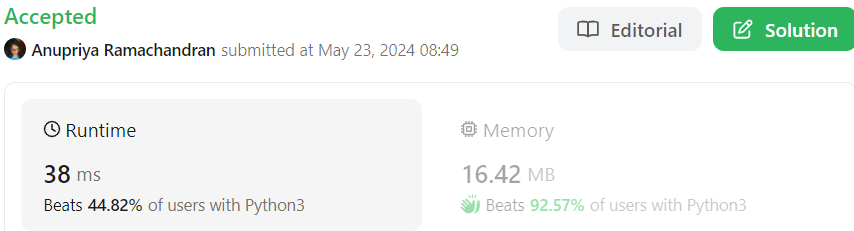

In [3]:
class Solution:
    def numDecodings(self, s: str) -> int:
        n = len(s)
        dp = [0 for _ in range(len(s) + 2)]
        dp[n] = 1
        front2 = 1
        front1 = 1
        cur = 0

        for i in range(n-1, -1, -1):
            if s[i] == '0':
                cur = 0
            else:
                single = front1
                multiple = 0
                if i < n -1  and 10 <= int(s[i] + s[i+1]) <= 26:
                    multiple = front2

                cur = single + multiple

            front2 = front1
            front1 = cur

        return front1